In [3]:
import numpy as np
import sklearn.model_selection as sklrn_ms
import sklearn.linear_model as sklrn_lm
import sklearn.metrics as sklrn_sm
import statsmodels.api as sm 
import statsmodels.miscmodels
import statsmodels.formula.api as sfa
import os
import mord
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

### Load Datasets

In [4]:
Disclosure_Raw = pd.read_excel('Workplace_Equity_Disclosure.xlsx', sheet_name='Sheet1')
Efficiency_2021 = pd.read_csv('2021_Firm_Efficiency.csv')

In [5]:
Disclosure_Raw = Disclosure_Raw[['Ticker', 'Reports EEO-1 Data']]

In [6]:
Data = pd.merge(Efficiency_2021, Disclosure_Raw, how='inner', on='Ticker')
Data_Merged = Data.drop(columns='Unnamed: 0')

In [7]:
Data_Merged.index = Data_Merged['Company']
Data_Merged = Data_Merged.dropna()
Data_Merged = Data_Merged.astype({'ModelID':'int64', 'value:MarketCap':'int64', 'Firm_Efficiency':'float64','Reports EEO-1 Data':'int64'})


In [8]:
Data_Merged

,Company,Ticker,SICS,ModelID,perform:OperatingRevenue,perform:CostRevenue,position:SellingGeneralAdministrative5yCapitalization,position:PropertyPlantEquipmentGross,position:OtherIntangibleAssets,position:LeaseContractCommitments,position:Goodwill,perform:ResearchDevelopmentExpenses,perform:FCF,value:MarketCap,Firm_Efficiency,Satisfied_Constraint,Reports EEO-1 Data
Company,,,,,,,,,,,,,,,,,
Booking Holdings Inc,Booking Holdings Inc,BKNG,25301030,1097171,10110,0,23040,2437,2163,480,3225,0,1813,86243,0.3704,Yes,0
Broadcom Inc,Broadcom Inc,AVGO,45301020,1097174,26050,9298,4028,5458,18536,674,38768,4117,15114,184141,1.0000,Yes,0
Baker Hughes Co,Baker Hughes Co,BKR,10101020,1097183,20425,16930,7397,11377,5567,340,21406,593,1931,15743,0.4223,No,0
Iqvia Holdings Inc,Iqvia Holdings Inc,IQV,35201010,1097184,12525,8126,4836,2222,5835,487,12868,0,2068,32052,0.4011,Yes,0
DuPont de Nemours Inc,DuPont de Nemours Inc,DD,15101020,1097186,21118,13707,8582,7293,12783,428,31177,971,3639,48751,0.4775,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ViacomCBS Inc,ViacomCBS Inc,VIAC,50201020,2191212,27624,17541,15523,7927,2952,1091,16749,0,4007,21956,0.5539,Yes,0
Otis Worldwide Corp,Otis Worldwide Corp,OTIS,20104020,2191216,13201,9188,4839,1962,597,0,1772,162,1342,27759,1.0000,Yes,0
Carrier Global Corp,Carrier Global Corp,CARR,20104010,2191217,18287,12839,7506,3609,1164,0,9444,396,1876,32986,1.0000,Yes,0


In [9]:
Data_4_Logit = Data_Merged[['value:MarketCap', 'Firm_Efficiency','ModelID', 'Reports EEO-1 Data']]
Data_4_Logit = Data_4_Logit.rename(columns={'Reports EEO-1 Data':'Reported_Binary','value:MarketCap':'Market_Cap'})

In [10]:
Train_Data, Test_Data = sklrn_ms.train_test_split(Data_4_Logit,test_size=0.2,random_state=0)

## Logistic Regression

In [415]:
Formula = ('Reported_Binary ~ Firm_Efficiency')
model = sfa.logit(Formula, Train_Data).fit()
model.summary()
           

Optimization terminated successfully.
         Current function value: 0.386940
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Reported_Binary   No. Observations:                  252
Model:                          Logit   Df Residuals:                      250
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Dec 2020   Pseudo R-squ.:                  0.1287
Time:                        16:14:12   Log-Likelihood:                -97.509
converged:                       True   LL-Null:                       -111.92
Covariance Type:            nonrobust   LLR p-value:                 7.954e-08
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.1334      0.404     -7.748      0.000      -3.926      -2.341
Firm_Efficiency     2.7237      0.553      4.922      0.000       1.639       3.808
===================================================================================
"""

### Odds Ratio
- Probability of Event Ocurring to Event NOT Ocurring --> (Prob/1-Prob)
- Odds Ratio tells us for a given n coefficient, a 1 unit increase in a variable will increase the odds of that variable by n times

In [416]:
Odds_Ratios = np.exp(model.params)
Odds_Ratios

Intercept           0.043570
Firm_Efficiency    15.237086
dtype: float64

### Confusion Matrix

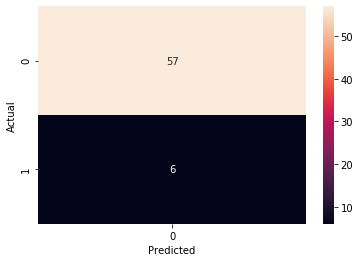

In [417]:
Prediction = model.predict(exog=Test_Data)
cutoff = 0.5
y_pred = np.where(Prediction > cutoff, 1, 0)
y_actual = Test_Data['Reported_Binary']

Matrix = pd.crosstab(y_actual, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(Matrix, annot=True)


In [418]:
Accuracy = sklrn_sm.accuracy_score(y_actual, y_pred)
print('Accuracy = %.3f' % Accuracy + '%')

Accuracy = 0.905%


In [420]:
Classification = sklrn_sm.classification_report(y_actual, y_pred)
print(Classification)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        57
           1       0.00      0.00      0.00         6

    accuracy                           0.90        63
   macro avg       0.45      0.50      0.48        63
weighted avg       0.82      0.90      0.86        63



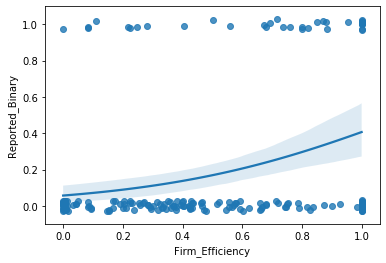

In [396]:
sn.regplot(x='Firm_Efficiency', y='Reported_Binary',
          y_jitter=0.03, data=Train_Data, logistic=True)

In [11]:
Data_Merged.to_csv('Data_4_Equity_Disclosure.csv')